In [18]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['Flower']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Flower               0
dtype: int64

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
x=df.iloc[:,:4]
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y=df['Flower']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Flower, dtype: int32

In [11]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred=dtc.predict(X_test)

In [14]:
pd.DataFrame(y_pred,y_test).head(10)

,0
Flower,
1,1
0,0
2,2
1,1
1,1
0,0
1,1
2,2
1,1


In [15]:
accuracy_score(y_test,y_pred)

1.0

In [16]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

[Text(558.0, 996.6, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(472.15384615384613, 815.4000000000001, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(643.8461538461538, 815.4000000000001, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(343.38461538461536, 634.2, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(171.69230769230768, 453.0, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(85.84615384615384, 271.79999999999995, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(257.53846153846155, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 453.0, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(429.23076923076917, 271.79999999999995, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(600.9230769230769, 271.79999999999995, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(515.0769230769231, 90.59999

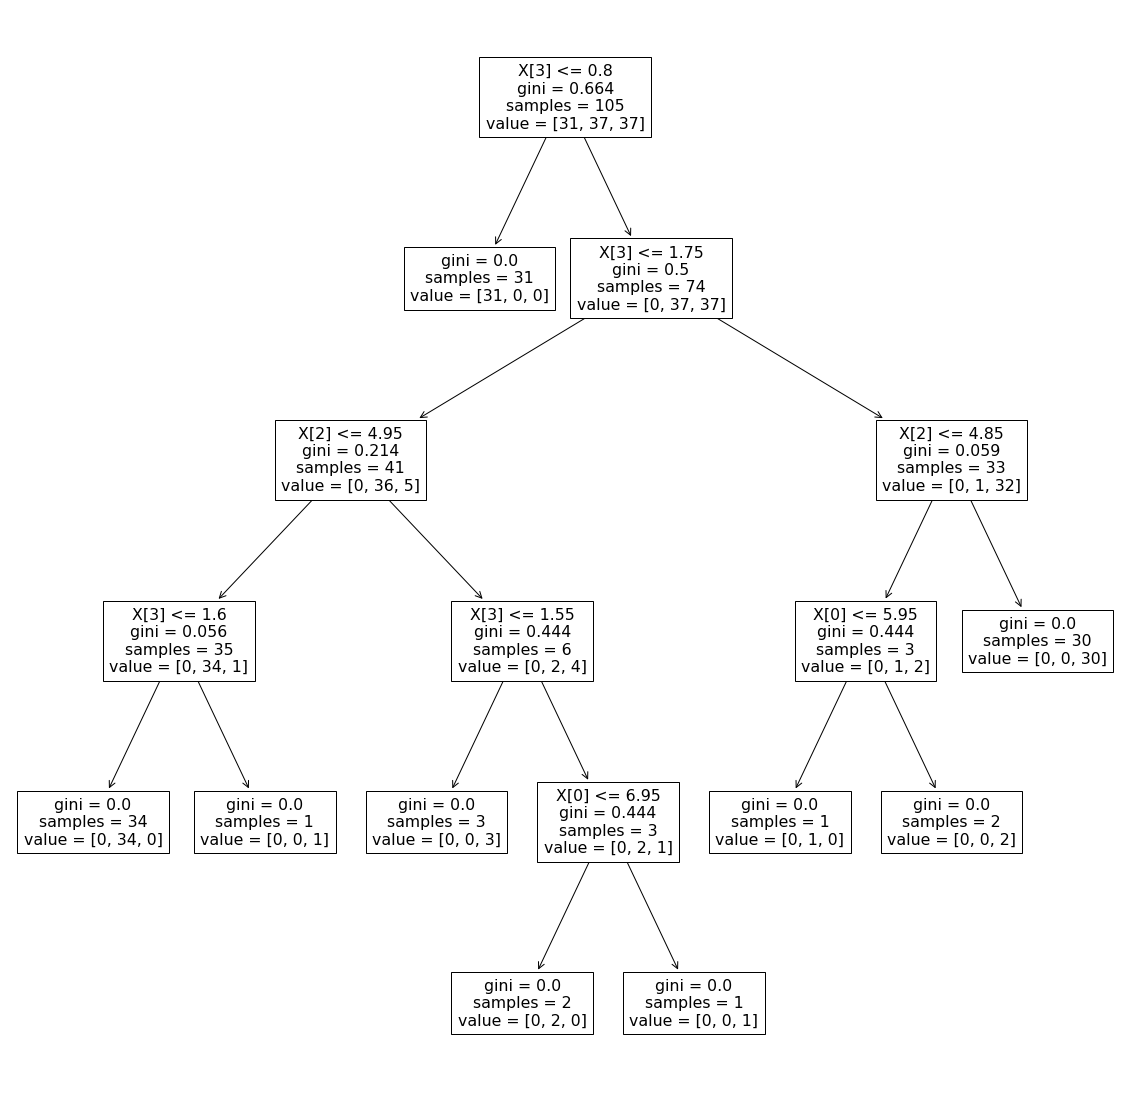

In [21]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtc)